<a href="https://colab.research.google.com/github/billbch/Clasification-posture/blob/main/efficientnet_v2_clasificador_de_buena_o_mala_postura_sentado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir sitting_well
!mkdir sitting_wrong

In [ ]:
%cd sitting_well
!unzip sitting_well.zip
%cd ..

%cd sitting_wrong
!unzip sitting_wrong.zip
%cd ..


In [3]:
#borrar zips
!rm -rf /content/sitting_well/sitting_well.zip
!rm -rf /content/sitting_wrong/sitting_wrong.zip

In [4]:
#mostrar cantidad de im de c/u
!ls /content/sitting_well | wc -l #103
!ls /content/sitting_wrong | wc -l #259

103
259


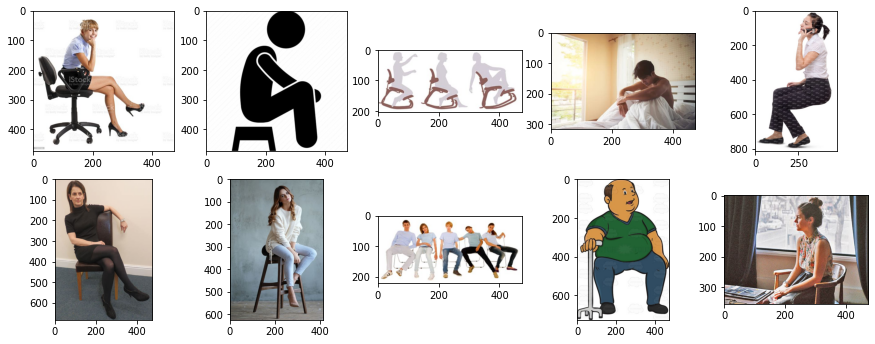

In [5]:
#ver imagenes
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/sitting_wrong'
imagenes = os.listdir(carpeta)
for i, nombreimg in enumerate(imagenes[:10]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [6]:
#borrar zips
!rm -rf /content/dataset

In [7]:
#crear crpeta dataset

!mkdir dataset
!mkdir dataset/sitting_well
!mkdir dataset/sitting_wrong

In [8]:
#copiar imagenes originales a la carpeta dataset
#con misma cantidad
import shutil

carpeta_fuente = '/content/sitting_well'
carpeta_destino = '/content/dataset/sitting_well'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i<103:
    #copiar de fuente a destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)


In [9]:
#copiar imagenes originales a la carpeta dataset
#con misma cantidad
import shutil

carpeta_fuente = '/content/sitting_wrong'
carpeta_destino = '/content/dataset/sitting_wrong'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i<103:
    #copiar de fuente a destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)
    

In [10]:
#mostrar cantidad de im de c/u del nuevo datset
!ls /content/dataset/sitting_well | wc -l #
!ls /content/dataset/sitting_wrong | wc -l #

103
103


In [11]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
#crear dataset generator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5,1.5],
    validation_split=0.2 #20% para pruebas
    )

data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset',target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')

data_gen_pruebas = datagen.flow_from_directory('/content/dataset',target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')


Found 166 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


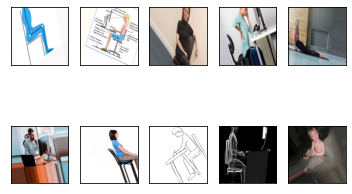

In [12]:
#imprimir 10 img del generador de entrenamiento
for image, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[i])
  break
plt.show()

In [13]:
import tensorflow as tf
import tensorflow_hub as hub

url = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2'
mobilenetv2 = hub.KerasLayer(url,input_shape=(224,224,3))

In [14]:
#congelar el modelo descargado
mobilenetv2.trainable = False

In [15]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2,activation='softmax')
])

In [16]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              10178374  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 10,180,376
Trainable params: 2,002
Non-trainable params: 10,178,374
_________________________________________________________________


In [33]:
#compilar
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [34]:
EPOCAS=50

historial = modelo.fit(data_gen_entrenamiento, epochs=EPOCAS,batch_size=32,
                       validation_data= data_gen_pruebas)

Epoch 1/50
6/6 [==============================] - 6s 751ms/step - loss: 0.4688 - accuracy: 0.8072 - val_loss: 0.9686 - val_accuracy: 0.5750
Epoch 2/50
6/6 [==============================] - 3s 459ms/step - loss: 0.5338 - accuracy: 0.7651 - val_loss: 1.0766 - val_accuracy: 0.6000
Epoch 3/50
6/6 [==============================] - 3s 457ms/step - loss: 0.4247 - accuracy: 0.7831 - val_loss: 1.0606 - val_accuracy: 0.6500
Epoch 4/50
6/6 [==============================] - 3s 458ms/step - loss: 0.4280 - accuracy: 0.7952 - val_loss: 0.9340 - val_accuracy: 0.6500
Epoch 5/50
6/6 [==============================] - 3s 449ms/step - loss: 0.4295 - accuracy: 0.8193 - val_loss: 1.0040 - val_accuracy: 0.5250
Epoch 6/50
6/6 [==============================] - 3s 447ms/step - loss: 0.4582 - accuracy: 0.7952 - val_loss: 0.8492 - val_accuracy: 0.6500
Epoch 7/50
6/6 [==============================] - 3s 461ms/step - loss: 0.4541 - accuracy: 0.7470 - val_loss: 0.9797 - val_accuracy: 0.6250
Epoch 8/50
6/6 [====

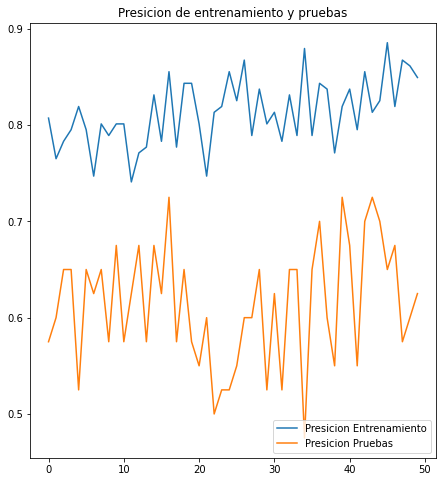

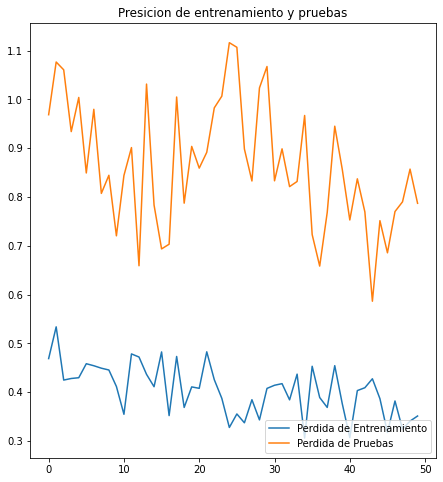

In [35]:
#Gracias
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Presicion Entrenamiento')
plt.plot(rango_epocas, val_acc,label='Presicion Pruebas')
plt.legend(loc='lower right')
plt.title('Presicion de entrenamiento y pruebas')
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, loss, label='Perdida de Entrenamiento')
plt.plot(rango_epocas, val_loss,label='Perdida de Pruebas')
plt.legend(loc='lower right')
plt.title('Presicion de entrenamiento y pruebas')
plt.show()


In [36]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1,224,224,3))
  return np.argmax(prediccion[0],axis=-1)


In [42]:
#0 = bien #1 = mal
url='https://lh6.googleusercontent.com/proxy/UhX0vLv1EilqlD1fWM6wTjsb4LYKTl-9Phu1MIlLyhWLjcUMii7sZb4Td4oiyR1AinOzeJfM5bxL5nLz-nIxIaeaP4YpxE4Lqfwi_NIrc1pTcCM0JCKXMXeWukcpQWMwqw=w1200-h630-p-k-no-nu'
prediccion = categorizar(url)
print(prediccion)

1/1 [==============================] - 0s 44ms/step
0
